# Analyzing CIA Factbook Data Using SQLite and Python

## Overview of the Data

In [1]:
# Loading the libraries
import sqlite3
import pandas as pd

In [2]:
# Connecting to the database
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

# First query
query1 = "SELECT * FROM sqlite_master WHERE type='table';"

# Showing the results of the first query
result_query1 = cursor.execute(query1).fetchall()
result_query1

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [3]:
# Using pandas to run the SQL query and return the results in a table
df_query1 = pd.read_sql_query(query1, conn)
df_query1

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
# Second query
query2 = "SELECT * FROM facts LIMIT 5"

# Using pandas to run the SQL query and return the results in a table
df_query2 = pd.read_sql_query(query2, conn)
df_query2

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

In [5]:
# Third query determining the minimum and maximum population, and the minimum and maximum population growth
query3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
df_query3 = pd.read_sql_query(query3, conn)
df_query3

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


We observe that there is a country with population equal to 0, and another one with population equal to 7.2 billion people. Let's have a look at these two countries.

## Exploring Outliers

In [6]:
# Fourth query to find the country with 0 population
query4 = "SELECT name, MIN(population) FROM facts"
df_query4 = pd.read_sql_query(query4, conn)
df_query4

,name,MIN(population)
0,Antarctica,0


In [7]:
# Fifth query to find the country with 7.2 billion people
query5 = "SELECT name, MAX(population) FROM facts"
df_query5 = pd.read_sql_query(query5, conn)
df_query5

,name,MAX(population)
0,World,7256490011


We observe from the two past queries that the country having 0 population is Antartica corresponding to the fact that there are no indigenous inhabitants, and that the 7.2 billion people result actually corresponds to the world population and it is not associated to a country.

## Histograms

In [8]:
# Loading the library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
query6 = '''SELECT name, population, population_growth, birth_rate, death_rate FROM facts 
            WHERE population != (SELECT MIN(population) FROM facts) 
            AND population != (SELECT MAX(population) FROM facts)
            ORDER BY name;'''

df_query6 = pd.read_sql_query(query6, conn)
df_query6.head(20)

,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342,2.32,38.57,13.89
1,Akrotiri,15700,NaN,NaN,NaN
2,Albania,3029278,0.30,12.92,6.58
3,Algeria,39542166,1.84,23.67,4.31
4,American Samoa,54343,0.30,22.89,4.75
5,Andorra,85580,0.12,8.13,6.96
6,Angola,19625353,2.78,38.78,11.49
7,Anguilla,16418,2.03,12.67,4.57
8,Antigua and Barbuda,92436,1.24,15.85,5.69
9,Argentina,43431886,0.93,16.64,7.33


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2463cc29b0>,
      dtype=object)

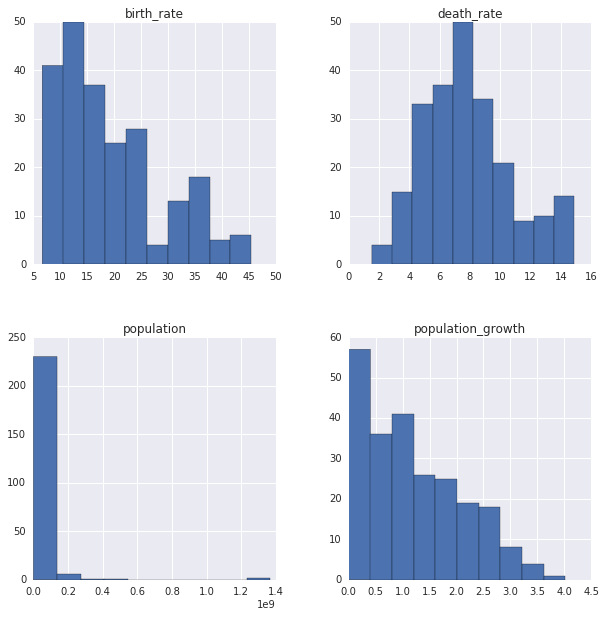

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

df_query6.hist(ax=ax)

## Which Countries Have the Highest Population Density

In [11]:
query7 = '''SELECT name, population/area_land AS population_density
            FROM facts ORDER BY population_density DESC'''
df_query7 = pd.read_sql_query(query7, conn)
df_query7.head(20)

,name,population_density
0,Macau,21168.0
1,Monaco,15267.0
2,Singapore,8259.0
3,Hong Kong,6655.0
4,Gaza Strip,5191.0
5,Gibraltar,4876.0
6,Bahrain,1771.0
7,Maldives,1319.0
8,Malta,1310.0
9,Bermuda,1299.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24617c04a8>]],
      dtype=object)

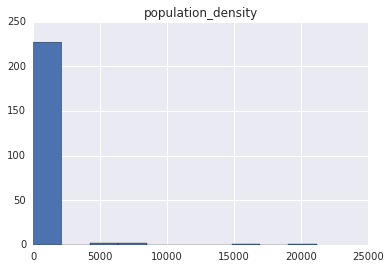

In [12]:
df_query7.hist()

## Which Countries Have the Highest Ratios of Water to Land

In [13]:
query8 = '''SELECT name, area_water/area_land AS ratio_WL FROM facts ORDER BY ratio_WL DESC'''
df_query8 = pd.read_sql_query(query8, conn)
df_query8.head(20)

,name,ratio_WL
0,British Indian Ocean Territory,905.0
1,Virgin Islands,4.0
2,Afghanistan,0.0
3,Albania,0.0
4,Algeria,0.0
5,Andorra,0.0
6,Angola,0.0
7,Antigua and Barbuda,0.0
8,Argentina,0.0
9,Armenia,0.0
